# Лабораторная работа №8 Фильтрация и свёртка

Кобыжев Александр, группа 3530901/80202

### Упражнение 8.1

Если увеличивать ширину гауссова окна STD без увеличения количества элементов в окне M, это окно становится ближе к прямоугольному, более высокие частоты подавляются хуже, и следующие параметры проявляются боковым лепестком.

### Упражнение 8.2

In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import scipy.signal

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

Начнём с гауссовского аналога:

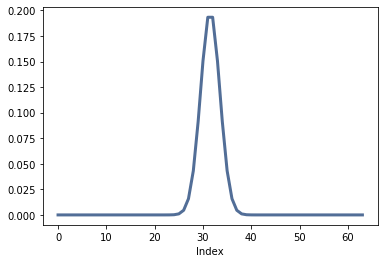

In [2]:
gaussian = scipy.signal.gaussian(M=64, std=2)
gaussian /= sum(gaussian)
thinkplot.plot(gaussian)
thinkplot.config(xlabel='Index')

Вот как выглядит БПФ:

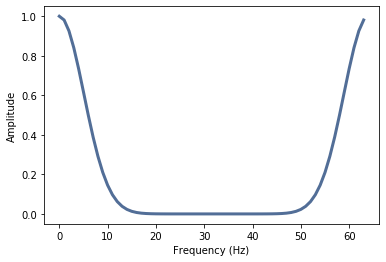

In [3]:
fft_gaussian = np.fft.fft(gaussian)
thinkplot.plot(abs(fft_gaussian))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

Если мы повернём отрицательные частоты влево, то сможем яснее увидеть, что это гауссово, по крайней мере приблизительно.

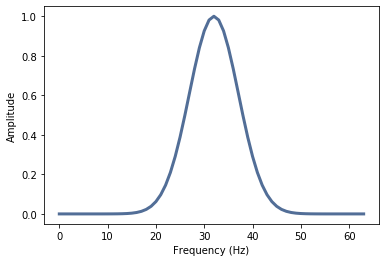

In [4]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
thinkplot.plot(abs(fft_rolled))
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

Эта функция отображает окно Гаусса и его БПФ друг с другом.

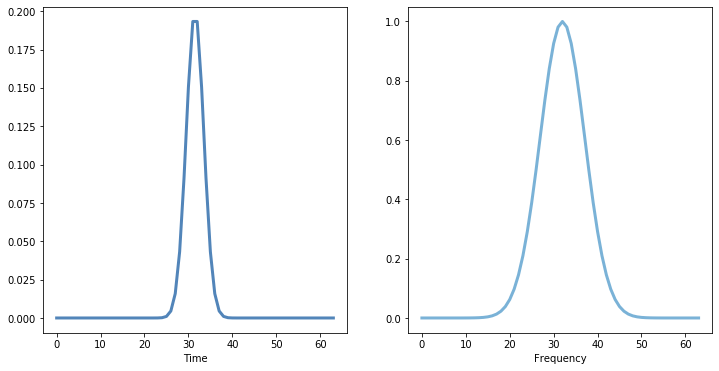

In [5]:
def plot_gaussian(std):
    M = 64
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    thinkplot.preplot(num=2, cols=2)
    thinkplot.plot(gaussian)
    thinkplot.config(xlabel='Time', legend=False)

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    thinkplot.subplot(2)
    thinkplot.plot(abs(fft_rolled))
    thinkplot.config(xlabel='Frequency')

    
plot_gaussian(2)

Теперь мы можем сделать взаимодействие, которое показывает, что происходит при изменении `std`.

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

По мере увеличения `std` Гауссовский становится шире, а его БПФ сужается.

С точки зрения непрерывной математики, если

$f(x) = e^{-a x^2}$

который является гауссовским со средним 0 и стандартным отклонением $1/a$, его преобразование Фурье имеет вид

$F(k) = \sqrt{\frac{\pi}{a}} e^{-\pi^2 k^2/a}$

который является гауссовским со стандартным отклонением $a / \pi^2$. Таким образом, существует обратная зависимость между стандартными отклонениями $f$ и $F$.

### Упражнение 8.3

Создадим 1-секундную волну с частотой дискретизации 44 кГц.

In [7]:
signal = thinkdsp.SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44000)

Затем создадим несколько окон. Выберем стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие.

In [8]:
M = 17
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [gaussian, blackman, hamming, hanning]
names = ['gaussian', 'blackman', 'hamming', 'hanning']

for window in windows:
    window /= sum(window)

Теперь посмотрим, как выглядят окна.

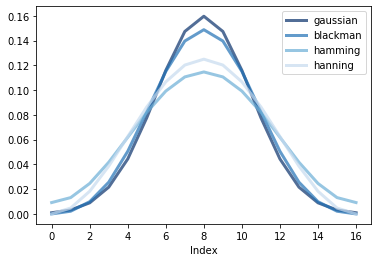

In [9]:
thinkplot.preplot(4)
for window, name in zip(windows, names):
    thinkplot.plot(window, label=name)

thinkplot.config(xlabel='Index', legend=True, loc='center bottom')

Они выглядят довольно похоже, но по Гауссу и Блэкману немного выше. Посмотрим, как выглядят их ДПФ:

In [10]:
def plot_window_dfts(windows, names):
    thinkplot.preplot(5)

    for window, name in zip(windows, names):
        padded = thinkdsp.zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        thinkplot.plot(abs(dft_window), label=name)

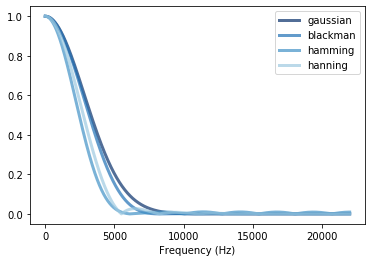

In [11]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', loc='upper right')

Тоже очень похоже, но похоже, что Гауссово падает быстрее всех, Блэкман - самым медленным, а у Ханнинга самые заметные боковые лепестки.

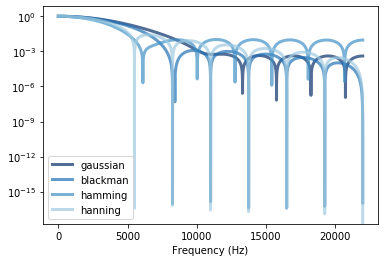

In [12]:
plot_window_dfts(windows, names)
thinkplot.config(xlabel='Frequency (Hz)', yscale='log', 
                 loc='lower left')

В логарифмической шкале мы видим, что сначала значения Хэмминга и Хеннинга падают быстрее, чем два других. И окна Хэмминга и Гаусса, кажется, имеют самые стойкие боковые лепестки. Окно Ханнинга, кажется, имеет наилучшее сочетание быстрого спада и минимальных боковых лепестков.